# Mean Reversion Strategy.

Based on previous analysis we try to make some profit out of the information on the mean revertness of the imbalance volume.
We present two strategies inherited from the Forex Trading market.

- **Bollinger Bands Strategy**
     - Given the Bollinger Bands indicator, if the imbalance volume breach the upper threshold then place a sell order.
     - Given the Bollinger Bands indicator, if the imbalance volume breach the lower threshold then place a buy order.
     
- **RSI Strategy**
    - Given the RSI indicator, if the imbalance volume breach the upper RSI threshold then place a sell order.
    - Given the RSI indicator, if the imbalance volume breach the lower RSI threshold then place a buy order.

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import math
import matplotlib.pyplot as plt
from itertools import product
from hurst import compute_Hc
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from AnalyticsModules.cleandata import CleanData
from BackTestModules.Strategy.MeanReversion import BollingerStrategy, RSIStrategy

%load_ext autoreload
%autoreload 2


# Data Preparation

In [2]:
raw = pd.read_csv('data/DOLCE.csv', delimiter = ';', parse_dates = True, index_col = 'time', sep = '\t', decimal = ',')
raw_vol = CleanData('data/imb_volumeUK.csv', 'imbalance volume').data

In [3]:
imb_volume = raw_vol.resample('H').mean()
imb_volume = imb_volume[:raw.index[-1]]

In [4]:
data = raw[['buy_price', 'spot_uk']]
data.rename(columns = {'buy_price' : 'imb_uk'}, inplace = True)
data['spread'] = data.imb_uk.sub(data.spot_uk)
data['imb_volume'] = imb_volume.values

data.dropna(inplace = True)

# Test The Strategy

## Bollinger Bands

In [5]:
training_size = math.ceil(data.shape[0]*0.7)

X_train = data[:training_size]
X_test = data[training_size:]

Returns perc. : 1.0796073444377932 | SMA = 10 | Scaling Factor = 1.5
STRATEGY PERFORMANCE
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Terminal Wealth: 1631.316911
----------------------------------------------------------------------------------------------------
Number of Trades: 430.0
Number of profitable trades: 410
Number of unprofitable trades: 20.0
----------------------------------------------------------------------------------------------------
Density of Trades: 0.28
Hit Ratio: 0.95


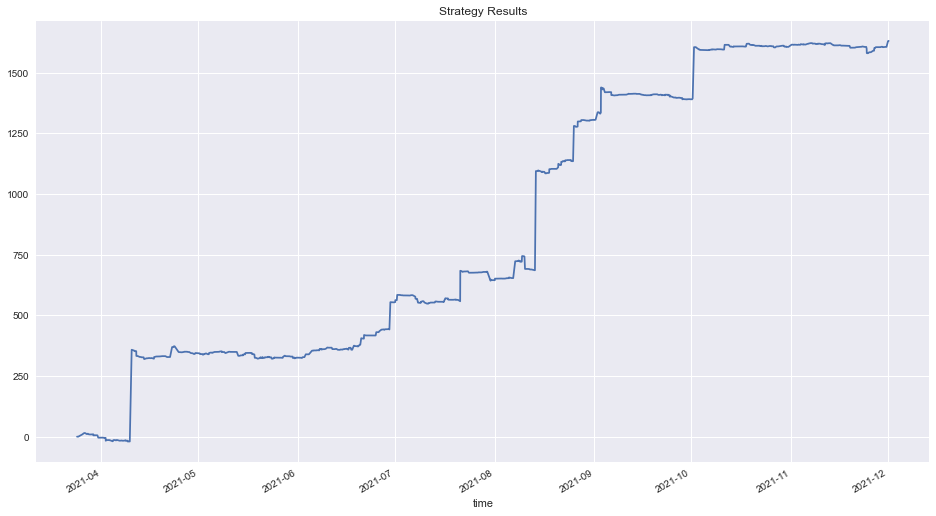

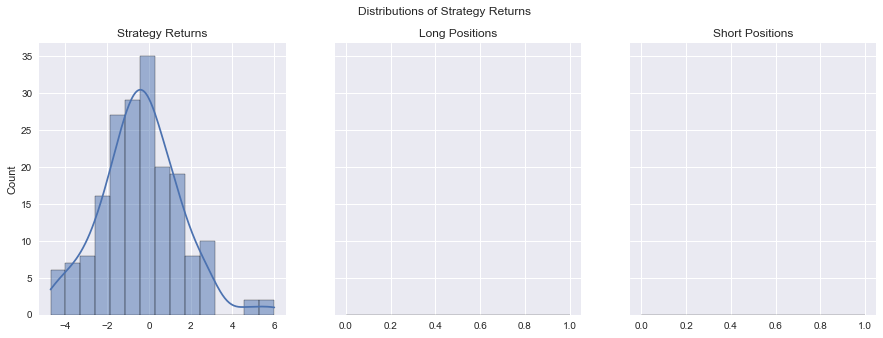

In [6]:
bb = BollingerStrategy(X_train)

SMA_range = [4,26,2]
DEV_range = np.arange(1.5, 4.0, 0.1)


bb.optimize_strategy(SMA_range, DEV_range)
bb.plot_results()
bb.plot_diagnostics()

STRATEGY PERFORMANCE
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Terminal Wealth: 349.078127
----------------------------------------------------------------------------------------------------
Number of Trades: 144.0
Number of profitable trades: 56
Number of unprofitable trades: 88.0
----------------------------------------------------------------------------------------------------
Density of Trades: 0.23
Hit Ratio: 0.39


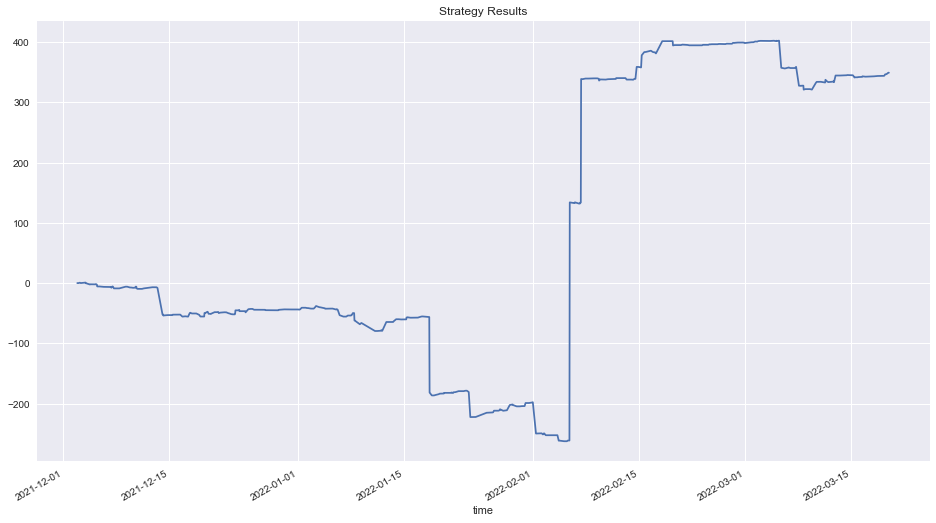

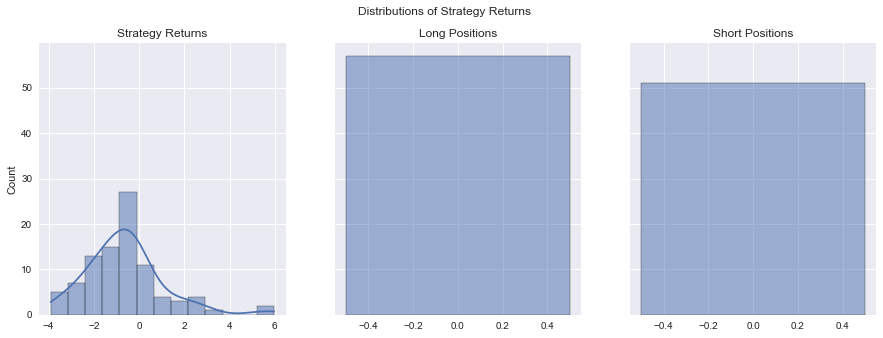

In [7]:
bb_test = BollingerStrategy(X_test)

bb_test.test_strategy(params = [22, 1.5])
bb_test.plot_results()
bb_test.plot_diagnostics(no_log = True)

## RSI Strategy

Returns perc. : 29 | EMA = 4 | Upper Threshold = 86 | Lower Threshold 29
STRATEGY PERFORMANCE
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Terminal Wealth: 539.010175
----------------------------------------------------------------------------------------------------
Number of Trades: 684.0
Number of profitable trades: 635
Number of unprofitable trades: 49.0
----------------------------------------------------------------------------------------------------
Density of Trades: 0.41
Hit Ratio: 0.93


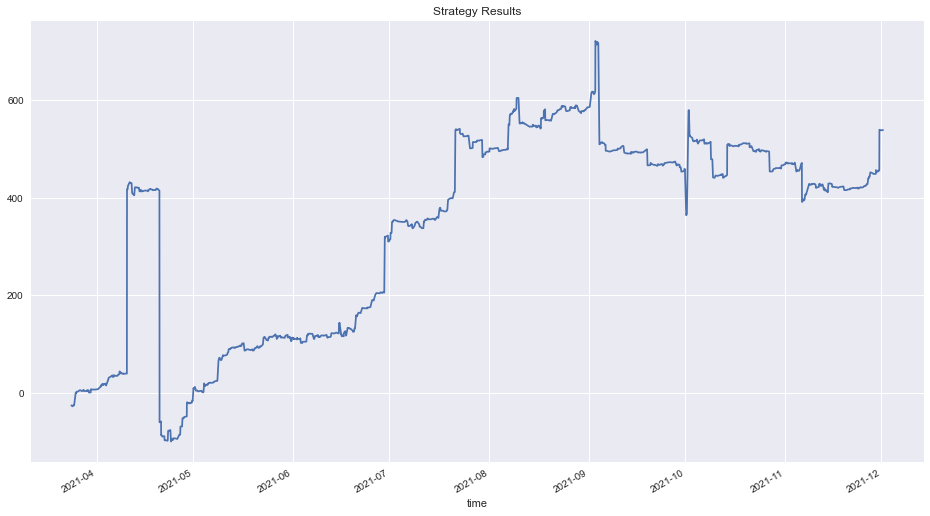

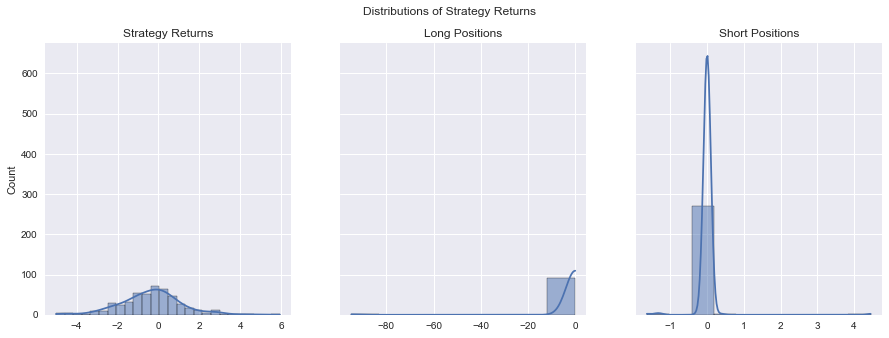

In [8]:
rsi_train = RSIStrategy(X_train)


ema_range = [4, 15, 1]
upper_range = [70,90,1]
lower_range = [20,30, 1]



rsi_train.optimize_strategy(ema_range, upper_range, lower_range)
rsi_train.plot_results()
rsi_train.plot_diagnostics(no_log = True)

STRATEGY PERFORMANCE
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Terminal Wealth: 918.889839
----------------------------------------------------------------------------------------------------
Number of Trades: 271.0
Number of profitable trades: 259
Number of unprofitable trades: 12.0
----------------------------------------------------------------------------------------------------
Density of Trades: 0.40
Hit Ratio: 0.96


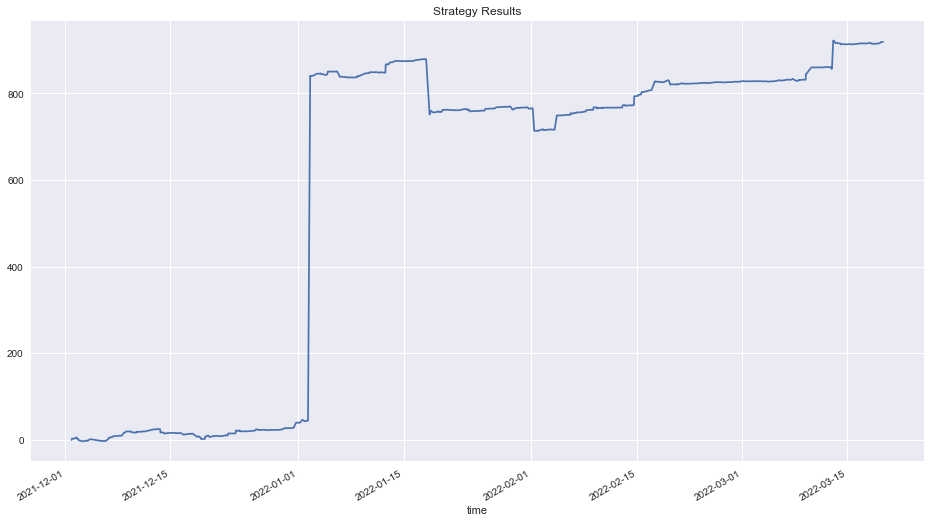

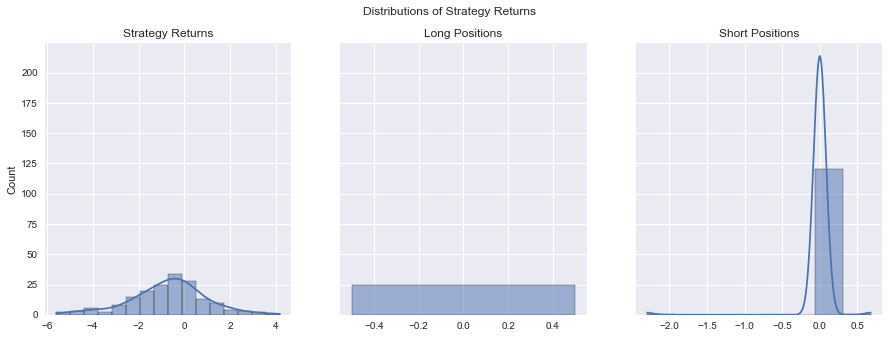

In [9]:
rsi_test = RSIStrategy(X_test)
rsi_test.test_strategy(params = [4, 89, 29])
rsi_test.plot_results()
rsi_test.plot_diagnostics(no_log = True)